In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Prep the Population DataFrame by getting rid of unneccessary columns, 
#cleaning the data types, and quierying the information needed.
data_dir = 'C:\\Users\\CAT\\Desktop\\Python'
file_name = data_dir + '\\New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv'
df = pd.read_csv(file_name)

df = df.drop(columns=['FIPS County Code'])
df['POPULATION'] = df['Population'].str.replace(',', '')
df['POPULATION'] = pd.to_numeric(df['POPULATION'])
df = df.loc[(df['Year']==2010)]
df.dtypes
df.head()

pop = df.groupby('Borough',as_index = False).sum()
pop = pop.drop(columns=['Year'])
pop

,Borough,POPULATION
0,Bronx,1385108
1,Brooklyn,2504700
2,Manhattan,1585873
3,Queens,2230722
4,Staten Island,468730


In [2]:
#Prep the Crime DataFrame by getting rid of unneccessary columns, 
#cleaning the data types, and quierying the information needed.
file_name2 = data_dir + '\\NYPD_Arrests_Data__Historic_.csv'
dfa =pd.read_csv(file_name2)

dfa = dfa.drop(columns=['ARREST_KEY','X_COORD_CD', 'Latitude', 'Longitude','Y_COORD_CD', 'OFNS_DESC','PD_CD', 'KY_CD', 'LAW_CODE', 'LAW_CAT_CD', 'JURISDICTION_CODE'])
dfa.head(10)

dfa['ARREST_DATE'] = pd.to_datetime(dfa['ARREST_DATE'])
dfa['Year'] = dfa['ARREST_DATE'].dt.year
dfa = dfa.loc[(dfa['Year']==2010)]
dfa = dfa.drop(columns=['Year'])

dfa.loc[(dfa['ARREST_BORO']=='S'), 'ARREST_BORO'] = 'Staten Island'
dfa.loc[(dfa['ARREST_BORO']=='Q'), 'ARREST_BORO'] = 'Queens'
dfa.loc[(dfa['ARREST_BORO']=='M'), 'ARREST_BORO'] = 'Manhattan'
dfa.loc[(dfa['ARREST_BORO']=='B'), 'ARREST_BORO'] = 'Bronx'
dfa.loc[(dfa['ARREST_BORO']=='K'), 'ARREST_BORO'] = 'Brooklyn'

dfa

,ARREST_DATE,PD_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
2531234,2010-12-31,"IMPERSONATION 2, PUBLIC SERVANT",Staten Island,122,18-24,M,BLACK
2531235,2010-12-31,"MARIJUANA, POSSESSION 4 & 5",Staten Island,120,25-44,F,ASIAN / PACIFIC ISLANDER
2531236,2010-12-31,"FORGERY,ETC.,UNCLASSIFIED-FELONY",Queens,113,18-24,F,BLACK
2531237,2010-12-31,"CONTROLLED SUBSTANCE, POSSESSION 7",Queens,101,45-64,M,BLACK
2531238,2010-12-31,"LOITERING,GAMBLING,OTHER",Queens,110,25-44,M,WHITE HISPANIC
...,...,...,...,...,...,...,...
2953551,2010-01-01,"BRIBERY,PUBLIC ADMINISTRATION",Bronx,52,18-24,M,BLACK HISPANIC
2953552,2010-01-01,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",Brooklyn,73,18-24,M,BLACK
2953553,2010-01-01,RESISTING ARREST,Brooklyn,75,25-44,M,BLACK
2953554,2010-01-01,"CONTROLLED SUBSTANCE,SALE 3",Brooklyn,73,45-64,F,BLACK


In [3]:
def  get_percent_nans(df, column_name):
    colSize = df.shape[0]
    empty = df.loc[df[column_name].isna()]
    emptySize = empty.shape[0]
    return (emptySize/colSize) * 100

for col in dfa.columns:
    print('The \"{}\" column has {:.2f}% empty values'.format(col, get_percent_nans(dfa, col)))

dfa

The "ARREST_DATE" column has 0.00% empty values
The "PD_DESC" column has 0.15% empty values
The "ARREST_BORO" column has 0.00% empty values
The "ARREST_PRECINCT" column has 0.00% empty values
The "AGE_GROUP" column has 0.00% empty values
The "PERP_SEX" column has 0.00% empty values
The "PERP_RACE" column has 0.00% empty values


,ARREST_DATE,PD_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
2531234,2010-12-31,"IMPERSONATION 2, PUBLIC SERVANT",Staten Island,122,18-24,M,BLACK
2531235,2010-12-31,"MARIJUANA, POSSESSION 4 & 5",Staten Island,120,25-44,F,ASIAN / PACIFIC ISLANDER
2531236,2010-12-31,"FORGERY,ETC.,UNCLASSIFIED-FELONY",Queens,113,18-24,F,BLACK
2531237,2010-12-31,"CONTROLLED SUBSTANCE, POSSESSION 7",Queens,101,45-64,M,BLACK
2531238,2010-12-31,"LOITERING,GAMBLING,OTHER",Queens,110,25-44,M,WHITE HISPANIC
...,...,...,...,...,...,...,...
2953551,2010-01-01,"BRIBERY,PUBLIC ADMINISTRATION",Bronx,52,18-24,M,BLACK HISPANIC
2953552,2010-01-01,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",Brooklyn,73,18-24,M,BLACK
2953553,2010-01-01,RESISTING ARREST,Brooklyn,75,25-44,M,BLACK
2953554,2010-01-01,"CONTROLLED SUBSTANCE,SALE 3",Brooklyn,73,45-64,F,BLACK


In [4]:
a_boroughs = dfa.groupby('ARREST_BORO')
a_bronx= a_boroughs.get_group('Bronx')
a_staten = a_boroughs.get_group('Staten Island')
a_brooklyn = a_boroughs.get_group('Brooklyn')
a_queens = a_boroughs.get_group('Queens')
a_manhattan = a_boroughs.get_group('Manhattan')

a_boroughs['PD_DESC'].value_counts().head(3)

pop['NUM_ARRESTS'] = [a_bronx.shape[0], a_brooklyn.shape[0],a_manhattan.shape[0], a_queens.shape[0], a_staten.shape[0]]
pop['LAND_AREA'] = [42.1, 70.82, 22.82, 108.53, 58.37]
pop['POP_DENSITY'] = pop.apply(lambda row: row.POPULATION//row.LAND_AREA, axis=1)
pop['ARRESTS/POPULATION%'] = pop.apply(lambda row: row.NUM_ARRESTS/row.POPULATION*100, axis=1)
pop['ARRESTS_PER_MILE'] = pop.apply(lambda row: row.NUM_ARRESTS//row.LAND_AREA, axis=1)
pop
s= a_boroughs['PD_DESC'].value_counts().head(3)

In [5]:
arrest_per_day=[]
for name, group in a_boroughs: 
    group_date = group.groupby('ARREST_DATE')
    arr_by_date = pd.DataFrame(group_date.size(), columns=['num_trips'])
    mean_arrests = arr_by_date['num_trips'].mean()
    arrest_per_day.append(mean_arrests)
pop['ARRESTS_PER_DAY'] = arrest_per_day 
pop

,Borough,POPULATION,NUM_ARRESTS,LAND_AREA,POP_DENSITY,ARRESTS/POPULATION%,ARRESTS_PER_MILE,ARRESTS_PER_DAY
0,Bronx,1385108,100535,42.10,32900.0,7.258279,2388.0,275.438356
1,Brooklyn,2504700,117900,70.82,35367.0,4.707151,1664.0,323.013699
2,Manhattan,1585873,113185,22.82,69494.0,7.137078,4959.0,310.095890
3,Queens,2230722,76441,108.53,20553.0,3.426738,704.0,209.427397
4,Staten Island,468730,14261,58.37,8030.0,3.042476,244.0,39.071233


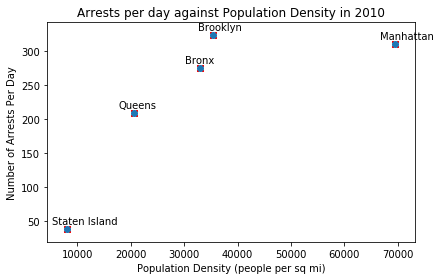

In [6]:
types = pop.reset_index()['Borough'].values
plt.plot(pop['POP_DENSITY'], pop['ARRESTS_PER_DAY'], 'o')
best_fit = np.polyfit(pop['POP_DENSITY'], pop['ARRESTS_PER_DAY'], 1)
p = np.poly1d(best_fit)
plt.gcf().set_size_inches(6, 4)
plt.xlabel('Population Density (people per sq mi)')
plt.ylabel('Number of Arrests Per Day')
plt.title('Arrests per day against Population Density in 2010')
plt.tight_layout()


x = pop['POP_DENSITY'].values
y = pop['ARRESTS_PER_DAY'].values
for i, txt in enumerate(types):
    plt.annotate(txt, (x[i], y[i]), xytext=(-15,5), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

plt.show()

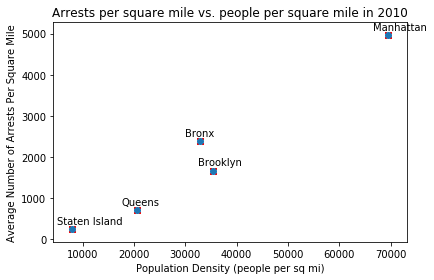

In [7]:
types = pop.reset_index()['Borough'].values
plt.plot(pop['POP_DENSITY'], pop['ARRESTS_PER_MILE'], 'o')
best_fit = np.polyfit(pop['POP_DENSITY'], pop['ARRESTS_PER_MILE'], 1)
p = np.poly1d(best_fit)
plt.gcf().set_size_inches(6, 4)
plt.xlabel('Population Density (people per sq mi)')
plt.ylabel('Average Number of Arrests Per Square Mile')
plt.title('Arrests per square mile vs. people per square mile in 2010')
plt.tight_layout()


x = pop['POP_DENSITY'].values
y = pop['ARRESTS_PER_MILE'].values
for i, txt in enumerate(types):
    plt.annotate(txt, (x[i], y[i]), xytext=(-15,5), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

plt.show()

In [11]:
pop.to_csv(r'C:\\Users\\CAT\\Desktop\\Python\\pop_vs_arrests POPULATION_vs_ARRESTS.csv', index = False)
